In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
raw_data = pd.read_csv('../data/spotify_data.csv')

In [4]:
raw_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
raw_data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [6]:
raw_data.artists.value_counts()[:10]

['Эрнест Хемингуэй']      1211
['Эрих Мария Ремарк']     1068
['Francisco Canaro']       942
['Frank Sinatra']          630
['Ignacio Corsini']        628
['Elvis Presley']          504
['Johnny Cash']            484
['Bob Dylan']              474
['The Rolling Stones']     471
['The Beach Boys']         455
Name: artists, dtype: int64

In [12]:
raw_data.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [16]:
data = raw_data.drop(labels=['artists', 'id', 'name', 'release_date'], axis=1)

In [17]:
data.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


In [18]:
data.isnull().sum()

valence             0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
dtype: int64

In [19]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [20]:
data.dtypes

valence             float64
year                  int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
popularity            int64
speechiness         float64
tempo               float64
dtype: object

array([[<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>]],
      dtype=object)

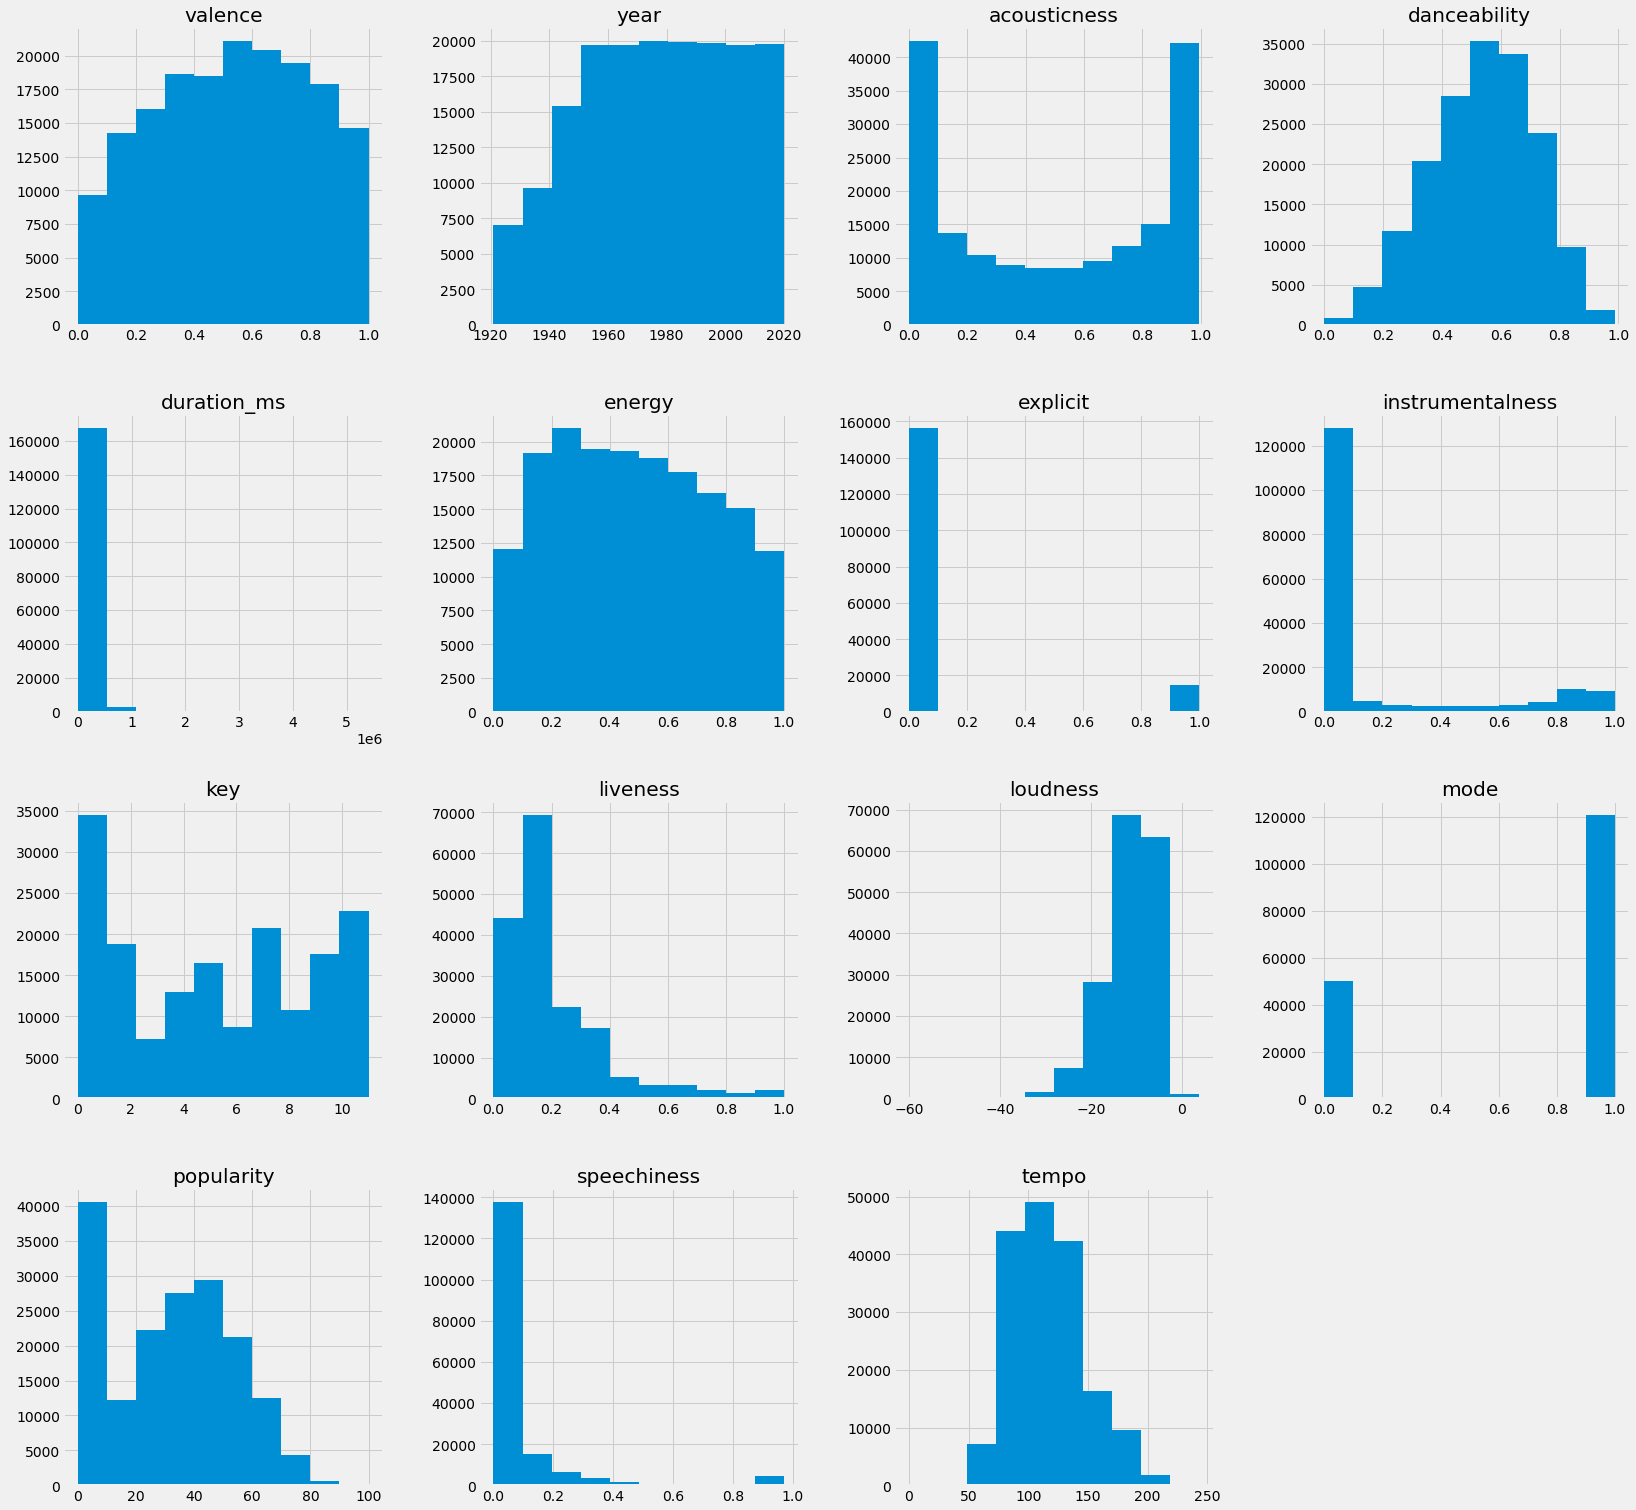

In [21]:
data.hist(figsize=(25, 25))

In [22]:
data.corr()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


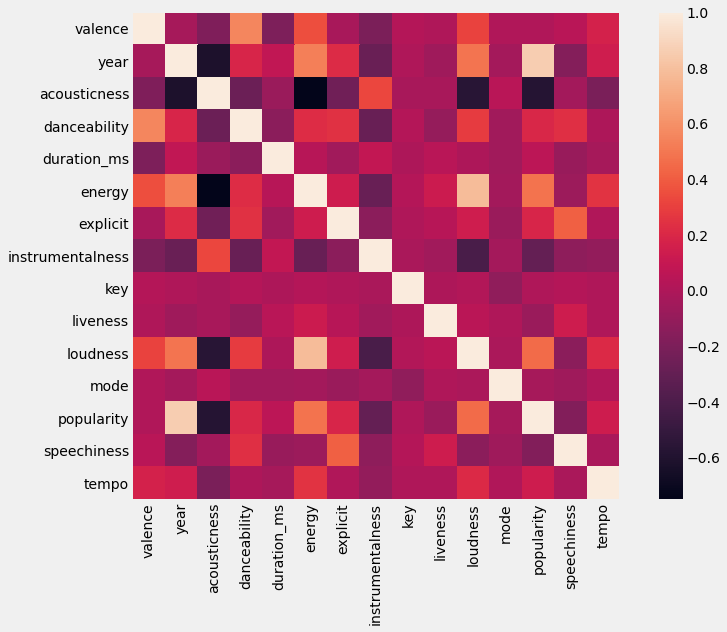

In [23]:
corr = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True, linecolor='white', annot=False)
plt.tight_layout()

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
X = StandardScaler().fit_transform(data)

In [27]:
ssds = []
for i in range(1, 20):
    print("Testing {d} clusters.".format(d=i))
    km = KMeans(n_clusters=i, random_state=322).fit(X)
    ssds.append(km.inertia_)
    

Testing 1 clusters.
Testing 2 clusters.
Testing 3 clusters.
Testing 4 clusters.
Testing 5 clusters.
Testing 6 clusters.
Testing 7 clusters.
Testing 8 clusters.
Testing 9 clusters.
Testing 10 clusters.
Testing 11 clusters.
Testing 12 clusters.
Testing 13 clusters.
Testing 14 clusters.
Testing 15 clusters.
Testing 16 clusters.
Testing 17 clusters.
Testing 18 clusters.
Testing 19 clusters.


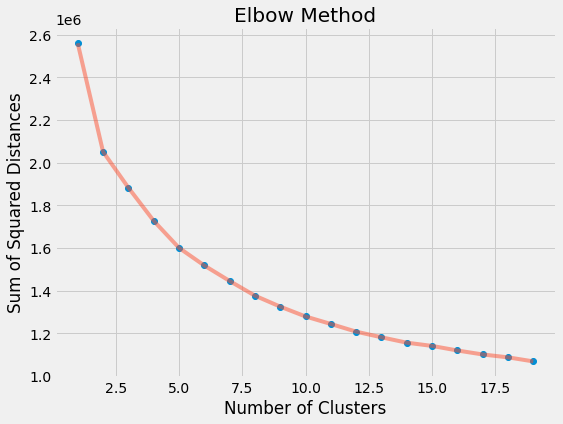

In [28]:
plt.plot(range(1,20), ssds, 'o')
plt.plot(range(1,20), ssds, '-', alpha=0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [29]:
y = KMeans(n_clusters=10, random_state=322).fit_predict(X)

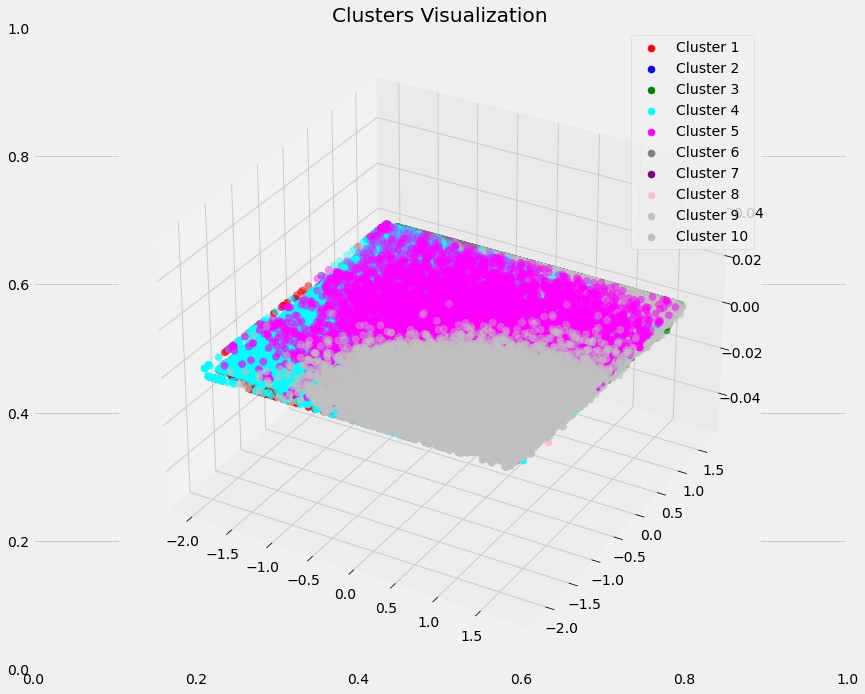

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y == 0,0], X[y == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(X[y == 1,0], X[y == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(X[y == 2,0], X[y == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(X[y == 3,0], X[y == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(X[y == 4,0], X[y == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(X[y == 5,0], X[y == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(X[y == 6,0], X[y == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(X[y == 7,0], X[y == 7,1], s= 50, c= 'pink', label= 'Cluster 8')
plt.scatter(X[y == 8,0], X[y == 8,1], s= 50, c= 'silver', label= 'Cluster 9')
plt.scatter(X[y == 9,0], X[y == 9,1], s= 50, c= 'silver', label= 'Cluster 10')

plt.title('Clusters Visualization')
plt.legend()

In [31]:
kmeans = pd.DataFrame(data=y, dtype=int)
kmeans.columns = ['k_cluster']

In [32]:
clustered_data = pd.concat([raw_data, kmeans], axis=1)

In [33]:
clustered_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,k_cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,6
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,8
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,3
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


In [34]:
clustered_data.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
5    54.797811
1    46.651366
2    44.506636
9    41.732177
4    30.090099
0    24.761238
3    16.088097
6    14.564692
8     7.431449
7     3.042024
Name: popularity, dtype: float64

In [35]:
clustered_data.loc[clustered_data.k_cluster == 5][:10]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,k_cluster
14,0.4930,1921,0.0175,['Zay Gatsby'],0.527,205072,0.691,1,0MJZ4hh60zwsYleWWxT5yW,0.384000,7,0.358,-7.298,1,Power Is Power,0,1921-03-27,0.0326,159.935,5
18,0.0778,1921,0.1480,['THE GUY'],0.604,204957,0.418,1,0QQmUf4aPFaN9U2yRko595,0.038200,4,0.102,-11.566,0,When We Die,0,1921-09-11,0.0417,80.073,5
107,0.2720,1921,0.1040,['THE GUY'],0.605,133669,0.329,1,4rkLztWpftdp6wJXtwmNWP,0.092300,11,0.334,-11.636,0,I Don't Need You,0,1921-09-11,0.0354,79.934,5
128,0.1910,1921,0.0169,['THE GUY'],0.713,224287,0.420,1,6T9dM3UsHEkXv5Q6diEm3r,0.488000,7,0.107,-11.957,0,Return/Gone,0,1921-09-11,0.0322,119.973,5
1068,0.7300,1927,0.0429,['Numba 9'],0.824,191112,0.363,1,0UU8y5xicqUQvaJSppEyOx,0.000099,7,0.370,-8.937,1,Smooth as Sade,0,1927,0.3500,165.001,5
1078,0.0949,1927,0.0235,['Numba 9'],0.630,278622,0.723,1,0cpkqvPmf7kNmmvPYZjMwH,0.000017,0,0.186,-3.529,1,Trash Bags of That Sour,0,1927,0.0490,156.888,5
1079,0.5660,1927,0.1980,['Numba 9'],0.609,231863,0.503,1,0dHWUBSmoHz956UurOZ9Ua,0.000064,6,0.178,-8.685,1,Higher Power Part Duece,0,1927,0.3920,173.951,5
1084,0.3200,1927,0.5680,['Numba 9'],0.461,264673,0.757,1,0hwDkCoXA68Hy297eSLAHT,0.000000,4,0.146,-3.993,0,I Be on the Grind,0,1927,0.3860,74.703,5
1121,0.6660,1927,0.0486,['Numba 9'],0.436,182622,0.709,1,1EP3FZb36DEY1RsrZiZ4lD,0.000000,8,0.168,-3.178,0,Ole Bitch,0,1927,0.2810,88.408,5
3985,0.6000,1941,0.0208,"['ОТВАЛ БАWKN', 'Cartier99', 'Hackequation']",0.883,135996,0.676,1,0dTnv43S8xfhsEmMfJOUpb,0.031000,11,0.107,-9.105,1,Trap,0,1941-05-05,0.1360,142.983,5


In [36]:
clustered_data.loc[clustered_data.k_cluster == 5].explicit.value_counts()

1    11786
Name: explicit, dtype: int64